# Imports

In [262]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt

from sklearn.preprocessing import TargetEncoder

plt.style.use('ggplot')

pd.options.display.max_columns = 999

import warnings

warnings.filterwarnings('ignore')

## Load Data

In [263]:
path = '/home/edilson07/projects/hackday_6/datasets/'

df_raw = pd.read_json(path + 'train.json', orient='split')

## Criar numero de caracteristicas

In [264]:
df_raw['product_details_count'] = df_raw['product_details'].apply(lambda x: len(ast.literal_eval(x)) )

## Transformar detalhes dos produtos em colunas

In [266]:
df_raw['product_details'] = df_raw['product_details'].apply(lambda x: ast.literal_eval(x))

In [267]:
all_keys = set()
for data in df_raw['product_details']:
    for item in data:
        all_keys.update(item.keys())

# Para cada chave no conjunto, crie uma coluna no DataFrame e preencha com os valores correspondentes
for key in all_keys:
    df_raw[key] = df_raw['product_details'].apply(lambda x: next((item[key] for item in x if key in item), np.nan))

# Remova a coluna 'product_details' original
df_raw.drop('product_details', axis=1, inplace=True)

In [269]:
df_raw.rename(columns={'Pack of': 'Pack Of 2'}, inplace=True)

# Preencha os valores NaN na coluna 'Pack Of' com os valores da coluna 'Pack Of' 2
df_raw['Pack Of'].fillna(df_raw['Pack Of 2'], inplace=True)

df_raw.drop('Pack Of 2', axis=1, inplace=True)

## Escolher as colunas com menos NaN

In [273]:
details_to_maintain = ['_id',
                       'average_rating',
                       'number_of_reviews',
                       'brand',
                       'category',
                       'crawled_at',
                       'description',
                       'images',
                       'out_of_stock',
                       'avg_delivery_time_days',
                       'pid',
                       'seller',
                       'sub_category',
                       'fabrication_time',
                       'title',
                       'actual_price',
                       'Sleeve',
                       'Pack Of',
                       'Brand Color',
                       'Size',
                       'Fit',
                       'Pattern',
                       'Ideal For',
                       'Suitable For',
                       'Fabric',
                       'Type',
                       'product_details_count',
                       #'Shade',
                       #'Pack Of 2']

df_raw = df_raw[details_to_maintain]

# Data Description

In [275]:
df1 = df_raw.copy()

In [277]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23309 entries, 0 to 23308
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     23309 non-null  object        
 1   average_rating          23309 non-null  float64       
 2   number_of_reviews       23309 non-null  int64         
 3   brand                   23309 non-null  object        
 4   category                23309 non-null  object        
 5   crawled_at              23309 non-null  datetime64[ns]
 6   description             23309 non-null  object        
 7   images                  23309 non-null  object        
 8   out_of_stock            23309 non-null  bool          
 9   avg_delivery_time_days  23309 non-null  int64         
 10  pid                     23309 non-null  object        
 11  seller                  23309 non-null  object        
 12  sub_category            23309 non-null  object     

In [278]:
df1.describe()

average_rating  number_of_reviews                     crawled_at  \
count    23309.000000       23309.000000                          23309   
mean         3.367322          27.767386  2021-02-10 22:55:49.561242624   
min          0.000000           0.000000            2021-02-10 20:11:51   
25%          3.100000          26.000000            2021-02-10 21:30:50   
50%          3.700000          31.000000            2021-02-10 23:01:37   
75%          4.100000          34.000000            2021-02-11 00:17:54   
max          5.000000          41.000000            2021-02-11 01:31:55   
std          1.157570           9.555809                            NaN   

       avg_delivery_time_days  fabrication_time  actual_price  \
count            23309.000000      23309.000000  19813.000000   
mean                 9.933502        366.663563   1480.980568   
min                  3.000000          1.000000    150.000000   
25%                  7.000000        184.000000    895.000000   
50%                 10.000000        369.000000   1256.000000   
75%                 13.000000        550.000000   1799.000000   
max                 19.000000        729.000000  12999.000000   
std                  3.568971        210.255811    967.824650   

       product_details_count  
count           23309.000000  
mean               13.438500  
min                 1.000000  
25%                11.000000  
50%                14.000000  
75%                17.000000  
max                25.000000  
std                 4.517272

## Criar colunas Numero de Imagens

In [279]:
df1['images'] = df1['images'].apply(lambda x: ast.literal_eval(x))

In [280]:
df1['number_images'] = df1['images'].apply(lambda x: len(x))

## Dropar colunas complicadas/descessarias

In [283]:
cols_drop = ['_id','crawled_at','description','title','images']

In [284]:
df1 = df1.drop(cols_drop, axis=1)

In [285]:
df1 = df1.dropna(subset='actual_price')

In [286]:
df1 = df1.fillna(0)

In [288]:
df1.isna().sum()

average_rating            0
number_of_reviews         0
brand                     0
category                  0
out_of_stock              0
avg_delivery_time_days    0
pid                       0
seller                    0
sub_category              0
fabrication_time          0
actual_price              0
Sleeve                    0
Pack Of                   0
Brand Color               0
Size                      0
Fit                       0
Pattern                   0
Ideal For                 0
Suitable For              0
Fabric                    0
Type                      0
product_details_count     0
number_images             0
dtype: int64

## Encoders

In [290]:
df1.nunique()

average_rating               38
number_of_reviews            32
brand                       301
category                      3
out_of_stock                  2
avg_delivery_time_days       17
pid                       18718
seller                      460
sub_category                 23
fabrication_time            729
actual_price                636
Sleeve                       20
Pack Of                      14
Brand Color                1611
Size                         15
Fit                          44
Pattern                     107
Ideal For                     6
Suitable For                  5
Fabric                      198
Type                        143
product_details_count        25
number_images                22
dtype: int64

In [291]:
df1.columns

Index(['average_rating', 'number_of_reviews', 'brand', 'category',
       'out_of_stock', 'avg_delivery_time_days', 'pid', 'seller',
       'sub_category', 'fabrication_time', 'actual_price', 'Sleeve', 'Pack Of',
       'Brand Color', 'Size', 'Fit', 'Pattern', 'Ideal For', 'Suitable For',
       'Fabric', 'Type', 'product_details_count', 'number_images'],
      dtype='object')

In [292]:
df1.dtypes

average_rating            float64
number_of_reviews           int64
brand                      object
category                   object
out_of_stock                 bool
avg_delivery_time_days      int64
pid                        object
seller                     object
sub_category               object
fabrication_time            int64
actual_price              float64
Sleeve                     object
Pack Of                    object
Brand Color                object
Size                       object
Fit                        object
Pattern                    object
Ideal For                  object
Suitable For               object
Fabric                     object
Type                       object
product_details_count       int64
number_images               int64
dtype: object

In [293]:
#ONE HOT ENCODER
onehot = ['category','out_of_stock']
df1 = pd.get_dummies(df1, columns=onehot)

In [295]:


#TARGET ENCODER
te_cols = ['brand','seller','sub_category','Sleeve', 'Pack Of',
       'Brand Color', 'Size', 'Fit', 'Pattern', 'Ideal For', 'Suitable For',
       'Fabric', 'Type']


df1[te_cols] = df1[te_cols].astype(str)

te = TargetEncoder(target_type='continuous')
df1[te_cols] = te.fit_transform(df1[te_cols], df1['actual_price'])



## Dropar ID E variável resposta

In [296]:
X = df1.drop(['pid','actual_price'], axis=1).copy()
y = df1['actual_price'].copy()

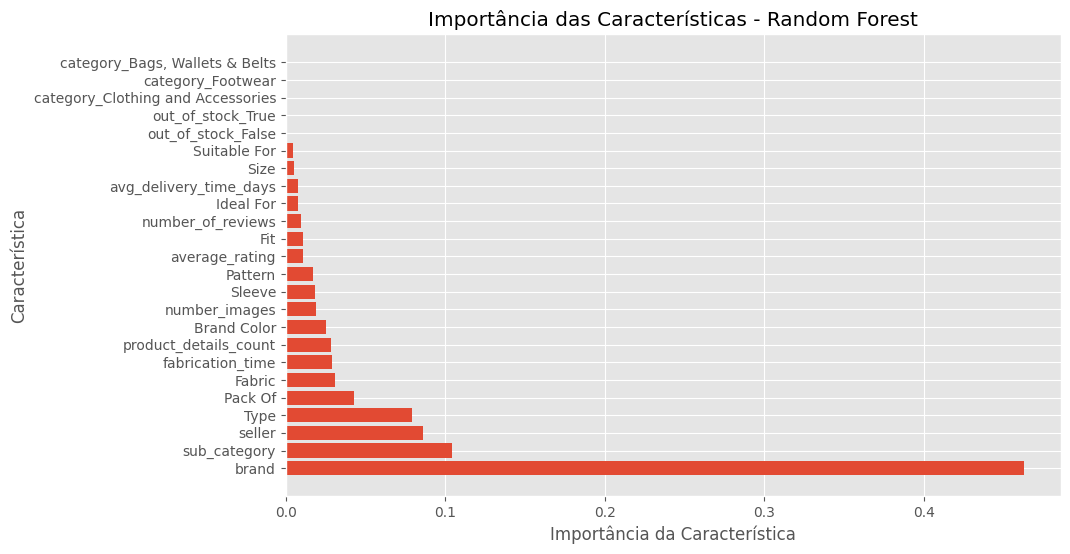

In [297]:
from sklearn.ensemble import RandomForestRegressor

# Crie o modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1) 

# Treine o modelo
rf.fit(X, y)

# Obtenha a importância das características
feature_importance = rf.feature_importances_

# Crie um DataFrame para facilitar a visualização
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Classifique as características com base na importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância da Característica')
plt.ylabel('Característica')
plt.title('Importância das Características - Random Forest')
plt.show()

# Machine Learning

In [354]:
X.head()

average_rating  number_of_reviews        brand  avg_delivery_time_days  \
0             3.2                 26  1066.890899                       8   
1             4.0                 33   697.140282                      12   
2             3.9                 32  1111.615766                      11   
3             3.8                 31  1043.699777                      11   
4             2.4                 20   829.703447                       5   

        seller  sub_category  fabrication_time       Sleeve      Pack Of  \
0  1066.890899    861.250434               653  1493.049042  1434.655927   
1   692.212157   1297.142890               668  1264.244961  1429.602185   
2  1080.930063   2537.407281                53  1987.645214  1472.485044   
3  1044.224176   1302.053079               510  1271.353007  1622.551922   
4   670.078444   1298.028510               496  1266.973358  1433.095832   

   Brand Color         Size          Fit      Pattern    Ideal For  \
0  1717.542274  1718.619375  1630.088894  1284.354160  1632.530803   
1  1229.871455  1229.126358  1306.974658  1284.508789  1384.742925   
2  1717.608548  1719.951799  1631.871398  1279.810549  1634.165981   
3  2196.419003  1197.617790  1310.123919  1630.035635  1387.859647   
4   974.716061  1154.695450  1301.320744  1279.111899  1391.162005   

   Suitable For       Fabric         Type  product_details_count  \
0   1326.288416  1378.516919  1695.932373                      6   
1   1553.045111  1491.134926  1131.358949                     16   
2   1555.884982  1233.102431  1699.514634                     13   
3   1552.247533  1500.638271  1328.211272                     18   
4   1555.884982  1498.829820  1130.736837                     15   

   number_images  category_Bags, Wallets & Belts  \
0              5                           False   
1              2                           False   
2              5                           False   
3              5                           False   
4              5                           False   

   category_Clothing and Accessories  category_Footwear  out_of_stock_False  \
0                               True              False                True   
1                               True              False                True   
2                               True              False                True   
3                               True              False                True   
4                               True              False                True   

   out_of_stock_True  
0              False  
1              False  
2              False  
3              False  
4              False

In [355]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Previsao No test(fazer as mesmas transformações do treino)

In [386]:
X_test = pd.read_json(path + 'test.json', orient='split')

In [387]:
X_test['product_details_count'] = X_test['product_details'].apply(lambda x: len(ast.literal_eval(x)) )

In [388]:
X_test['product_details'] = X_test['product_details'].apply(lambda x: ast.literal_eval(x))

In [389]:
all_keys = set()
for data in X_test['product_details']:
    for item in data:
        all_keys.update(item.keys())

# Para cada chave no conjunto, crie uma coluna no DataFrame e preencha com os valores correspondentes
for key in all_keys:
    X_test[key] = X_test['product_details'].apply(lambda x: next((item[key] for item in x if key in item), np.nan))

# Remova a coluna 'product_details' original
X_test.drop('product_details', axis=1, inplace=True)

In [390]:
X_test.rename(columns={'Pack of': 'Pack Of 2'}, inplace=True)
# Preencha os valores NaN na coluna 'Pack Of' com os valores da coluna 'Pack Of' 2
X_test['Pack Of'].fillna(X_test['Pack Of 2'], inplace=True)

# Agora você pode descartar a coluna 'Pack Of 2' se desejar
X_test.drop('Pack Of 2', axis=1, inplace=True)

In [391]:
X_test['images'] = X_test['images'].apply(lambda x: ast.literal_eval(x))

In [392]:
X_test['number_images'] = X_test['images'].apply(lambda x: len(x))

In [393]:
details_to_maintain_test = ['_id',
                       'average_rating',
                       'number_of_reviews',
                       'brand',
                       'category',
                       'crawled_at',
                       'description',
                       'images',
                       'out_of_stock',
                       'avg_delivery_time_days',
                       'pid',
                       'seller',
                       'sub_category',
                       'fabrication_time',
                       'title',
                       #'actual_price',
                       'Sleeve',
                       'Pack Of',
                       'Brand Color',
                       'Size',
                       'Fit',
                       'Pattern',
                       'Ideal For',
                       'Suitable For',
                       'Fabric',
                       'Type',
                       'product_details_count',
                       'number_images',
                       #'Shade',
                           ]

In [394]:
X_test = X_test[details_to_maintain_test]

In [395]:
X_test.head()

_id  average_rating  number_of_reviews  \
0  35d28961-170f-515d-90d4-55ee978a8afa             4.8                 40   
1  5089618f-7eec-571b-84b6-41c3b43a2ed4             3.7                 31   
2  84716375-2ea3-5376-bca1-ecef76b0aa87             3.2                 26   
3  84120873-2b67-5f2c-9074-803e52e278f7             3.6                 30   
4  96238f84-3bb8-5ec1-b2f4-fe481ba35faa             2.5                 21   

      brand                  category          crawled_at  \
0        Mo  Clothing and Accessories 2021-02-10 21:18:47   
1   True Bl  Clothing and Accessories 2021-02-10 22:12:20   
2  vims rai  Clothing and Accessories 2021-02-11 01:16:36   
3   True Bl  Clothing and Accessories 2021-02-10 22:21:32   
4  ECKO Unl  Clothing and Accessories 2021-02-10 22:32:00   

                                         description  \
0  Accentuate your formal wardrobe by buying this...   
1                                          undefined   
2                                          undefined   
3                                          undefined   
4  ECKO Unltd YD CHECK  Cotton Woven Slim Fit IND...   

                                              images  out_of_stock  \
0  [https://rukminim1.flixcart.com/image/128/128/...         False   
1  [https://rukminim1.flixcart.com/image/128/128/...         False   
2  [https://rukminim1.flixcart.com/image/128/128/...         False   
3  [https://rukminim1.flixcart.com/image/128/128/...         False   
4  [https://rukminim1.flixcart.com/image/128/128/...         False   

   avg_delivery_time_days               pid               seller  \
0                      17  SHTFDYZGEXPED7YS               KKSONS   
1                      10  TROFM47EVWRYK7ZU  KAPSONSRETAILPVTLTD   
2                       8  FABFZAMPGDW3BKGX            WHITE SKY   
3                      10  BZRFNMGPNBQTYHMG  KAPSONSRETAILPVTLTD   
4                       5  SHTFV5G6PZDQZEVZ       SandSMarketing   

                    sub_category  fabrication_time  \
0                        Topwear                32   
1                     Bottomwear               318   
2                        Fabrics               411   
3  Blazers, Waistcoats and Suits               431   
4                        Topwear               512   

                                               title       Sleeve Pack Of  \
0  Men Slim Fit Printed Button Down Collar Casual...  Full Sleeve       1   
1           Slim Fit Men Brown Cotton Blend Trousers          NaN       1   
2           Rayon Printed Shirt Fabric  (Unstitched)          NaN     NaN   
3  Solid Single Breasted Formal Men Full Sleeve B...  Full Sleeve       1   
4  Men Slim Fit Checkered Cut Away Collar Casual ...  Full Sleeve       1   

  Brand Color Size       Fit    Pattern Ideal For  Suitable For        Fabric  \
0         NaN  NaN      Slim    Printed       NaN  Western Wear  Cotton Blend   
1         NaN  NaN  Slim Fit      Solid       NaN  Western Wear  Cotton Blend   
2         NaN  NaN       NaN    Printed       Men           NaN         Rayon   
3         NaN  NaN       NaN      Solid       NaN           NaN     Polyester   
4         NaN  NaN      Slim  Checkered       NaN  Western Wear  Cotton Blend   

              Type  product_details_count  number_images  
0              NaN                     14              4  
1  Casual Trousers                     14              5  
2     Shirt Fabric                     15              4  
3  Single Breasted                     11              5  
4              NaN                     13              5

In [396]:
X_test = pd.get_dummies(X_test, columns=onehot)
X_test[te_cols] = te.transform(X_test[te_cols])

In [397]:
X_test = X_test.drop(cols_drop, axis=1)
X_test = X_test.drop('pid', axis=1)

In [398]:
X_test.head()

average_rating  number_of_reviews        brand  avg_delivery_time_days  \
0             4.8                 40  1444.867614                      17   
1             3.7                 31  2625.158350                      10   
2             3.2                 26  1203.601184                       8   
3             3.6                 30  2625.158350                      10   
4             2.5                 21  1281.544466                       5   

        seller  sub_category  fabrication_time       Sleeve      Pack Of  \
0  1484.968130   1299.049885                32  1976.394231  1431.158920   
1  2845.184491   1996.485795               318  1480.980568  1431.158920   
2  1219.220717   1197.636572               411  1480.980568  1480.980568   
3  2845.184491   4129.189314               431  1976.394231  1431.158920   
4  1271.418787   1299.049885               512  1976.394231  1431.158920   

   Brand Color         Size          Fit      Pattern    Ideal For  \
0  1480.980568  1480.980568  1411.139804  1283.628944  1480.980568   
1  1480.980568  1480.980568  2160.091736  1629.287467  1480.980568   
2  1480.980568  1480.980568  1480.980568  1283.628944  1386.974560   
3  1480.980568  1480.980568  1480.980568  1629.287467  1480.980568   
4  1480.980568  1480.980568  1411.139804  1483.169153  1480.980568   

   Suitable For       Fabric         Type  product_details_count  \
0   1552.498280  1496.650804  1480.980568                     14   
1   1552.498280  1496.650804  2270.457512                     14   
2   1480.980568  1256.351490  1206.847489                     15   
3   1480.980568  2263.556790  5657.115926                     11   
4   1552.498280  1496.650804  1480.980568                     13   

   number_images  category_Bags, Wallets & Belts  \
0              4                           False   
1              5                           False   
2              4                           False   
3              5                           False   
4              5                           False   

   category_Clothing and Accessories  category_Footwear  out_of_stock_False  \
0                               True              False                True   
1                               True              False                True   
2                               True              False                True   
3                               True              False                True   
4                               True              False                True   

   out_of_stock_True  
0              False  
1              False  
2              False  
3              False  
4              False

## Predict

In [399]:
y_pred = xgb.predict(X_test)


## submissao

In [400]:
X_test = pd.read_json(path + 'test.json', orient='split')

In [401]:
X_test['actual_price'] = y_pred

In [402]:
cols_sub = ['pid','actual_price']
df_submission = X_test[cols_sub]

In [404]:
df_submission.to_csv('terceira_submissao.csv', index=False)